# Abalone Project - Exploratory Data Analysis
Maria Eugênia Fonseca\
2021/09/12

In [10]:
import pandas as pd
from dataprep.eda import create_report, plot_diff
import statistics

In [2]:
col_names = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

data = pd.read_csv("../data/raw/abalone_data.txt", header = None, names=col_names)

In [3]:
data.head()

sex  length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [4]:
data['age'] = data['rings'] + 1.5

In [5]:
data.drop('rings', axis=1, inplace=True)

In [6]:
data.describe()

length     diameter       height  whole_weight  shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       viscera_weight  shell_weight          age  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831    11.433684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     2.500000  
25%          0.093500      0.130000     9.500000  
50%          0.171000      0.234000    10.500000  
75%          0.253000      0.329000    12.500000  
max          0.760000      1.005000    30.500000

From the describe we noticed a strange case of observation with height equal to zero.

In [7]:
data[data['height'] == 0]

sex  length  diameter  height  whole_weight  shucked_weight  \
1257   I   0.430      0.34     0.0         0.428          0.2065   
3996   I   0.315      0.23     0.0         0.134          0.0575   

      viscera_weight  shell_weight  age  
1257          0.0860        0.1150  9.5  
3996          0.0285        0.3505  7.5

C:\Users\fonse\anaconda3\envs\abalone\lib\site-packages\dask\utils.py:893: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  return getattr(obj, self.method)(*args, **kwargs)
C:\Users\fonse\anaconda3\envs\abalone\lib\site-packages\dask\utils.py:893: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  return getattr(obj, self.method)(*args, **kwargs)
C:\Users\fonse\anaconda3\envs\abalone\lib\site-packages\dask\utils.py:893: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  return getattr(obj, self.method)(*args, **kwargs)
C:\Users\fonse\anaconda3\envs\abalone\lib\site-packages\dask\utils.py:893: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  return getattr(obj, self.method)(*args, **kwargs)
C:\Users\fonse\anaconda3\envs\abalone\lib\site-packages\dask\utils.p

  0%|                                                                                                         …

C:\Users\fonse\anaconda3\envs\abalone\lib\site-packages\dask\utils.py:893: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  return getattr(obj, self.method)(*args, **kwargs)
C:\Users\fonse\anaconda3\envs\abalone\lib\site-packages\dask\utils.py:893: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  return getattr(obj, self.method)(*args, **kwargs)
C:\Users\fonse\anaconda3\envs\abalone\lib\site-packages\dask\utils.py:893: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  return getattr(obj, self.method)(*args, **kwargs)
C:\Users\fonse\anaconda3\envs\abalone\lib\site-packages\dask\utils.py:893: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  return getattr(obj, self.method)(*args, **kwargs)
C:\Users\fonse\anaconda3\envs\abalone\lib\site-packages\dask\utils.p


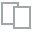
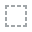
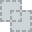
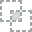
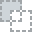
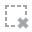
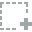
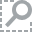
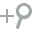
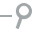
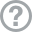
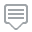
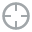
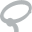
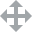
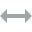
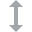
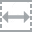
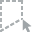
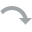
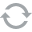
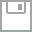
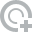
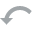
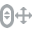
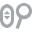
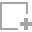
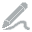
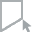
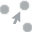
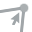
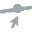

In [8]:
create_report(data).show()

Next, we will plot de variables comparing the younger and older observations. The threshold was the median age.


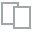
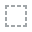
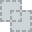
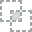
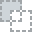
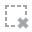
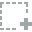
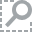
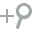
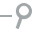
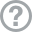
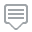
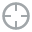
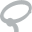
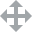
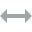
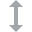
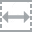
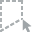
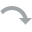
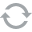
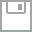
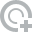
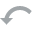
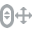
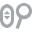
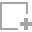
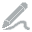
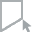
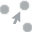
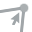
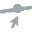

In [12]:
younger = data[data["age"] <= statistics.median(data["age"])]
older = data[data["age"] > statistics.median(data["age"])]
plot_diff([younger, older], config={"diff.label": ["younger", "older"]})

### Some insights:
- Zero missing values. No treatment needed
- Two observations have heitgh zero. We should remove them
- Some variables are skewed. We should consider a transformation
- The variables have different scales. We should consider a transformation
- We should encode de categorical variable Sex
- All variables correlate positively to age
- All variables have a strong correlation between themselves. We could consider feature selection
- The younger the abalone, in general, the smaller the abalone